# Задание 1. Моделирование случайных величин

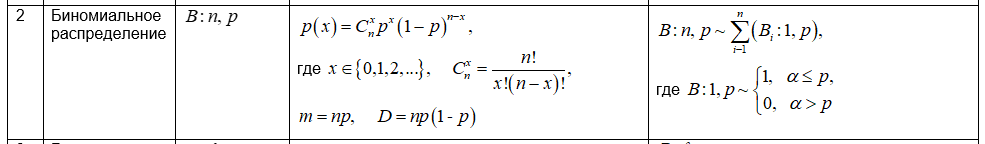

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#генерация по Бернулли
def generate_bernoulli(alpha, n): 
    uniformed = np.random.sample(n)
    bernoulli = list(uniformed >= alpha).count(True)
    return bernoulli

In [3]:
n=1000 #число величин, которое мы будем генерировать
p=0.5
alpha=0.5 #шанс получить единицу
values = [generate_bernoulli(alpha, n) for i in range(n)] #сгенерированные величины (x)

In [4]:
#вспомогательная функция вычисления биномиального коэффициента
def binomial_coefficient(n, x):
    return math.factorial(n)/(math.factorial(x)*math.factorial(n-x))

In [5]:
#вычисление вероятности
def calculating_probability(n, x, p):
    return binomial_coefficient(n, x)*(p**x)*((1-p)**(n-x))

In [6]:
set_values = set(values) # множество значений
all_probability = [calculating_probability(n, i, p) for i in set_values] #вероятность для каждого

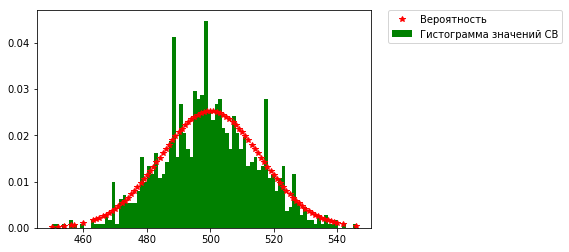

In [7]:
plt.plot(list(set_values), all_probability, 'r*', label = 'Вероятность')
plt.hist(values, normed = 1, bins = len(set_values), color = 'green', label = 'Гистограмма значений СВ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [8]:
N=list(range(1,n+1))
m=n*p
d=n*p*(1-p)

In [9]:
# вычисление выборочного среднего
def sample_mean(x):
    if type(x) == list:
        n = len(x)
    else:
        n = x.shape[0]
    X = np.vstack([x]*n)
    X_ = np.tril(X)
    ms = X_.sum(1)/ N 
    return ms

In [10]:
ms = sample_mean(values)

In [11]:
def plot_mean(m,ms):
    N = list(range(1,len(ms)+1))
    plt.plot(N,ms,'r',label = 'Выборочное среднее')
    plt.axhline(m,color = 'g', label = 'Матожидание')
    plt.xlabel('Число реализаций СВ')
    plt.ylabel('Значения выборочного среднего')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

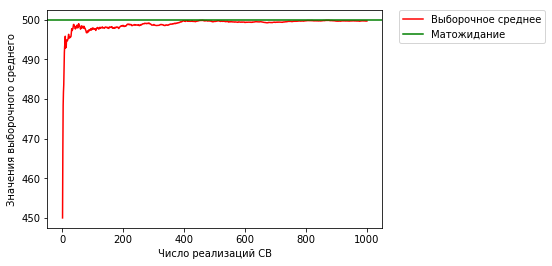

In [12]:
plot_mean(m,ms)

In [13]:
# вычисление выборочной дисперсии
def sample_variance(x):
    if type(x) == list:
        n = len(x)
    else:
        n = x.shape[0]
    X = np.vstack([x]*n)
    ms = sample_mean(x)
    vd = np.tril(np.square(X - ms)).sum(1)/N
    return vd

In [14]:
vd = sample_variance(values)

In [15]:
def plot_variance(d,vd):
    N = list(range(1,len(vd)+1))
    plt.plot(N,vd,'r',label = 'Выборочная дисперсия')
    plt.axhline(d,color = 'g', label = 'Дисперсия')
    plt.xlabel('Число реализаций СВ')
    plt.ylabel('Значения выборочной дисперсии')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

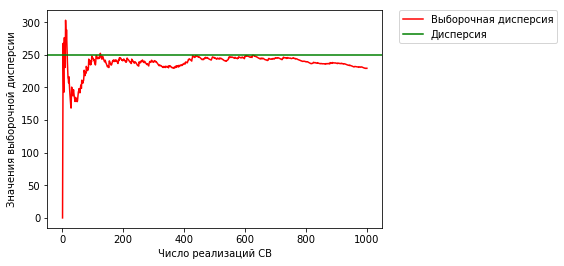

In [16]:
plot_variance(d, vd)